In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1st JAR: DATA 

In [192]:
dataset = pd.read_csv('Salary_dataset.csv') #read the dataset

In [193]:
print(dataset.shape)
dataset.head()

(30, 3)


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [194]:
dataset=dataset.drop(['Unnamed: 0'], axis=1)

In [195]:
dataset.shape

(30, 2)

In [196]:
dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


# 1) Checking for Outliers

In [197]:
iqr=dataset.YearsExperience.quantile(0.75)-dataset.YearsExperience.quantile(0.25)
ut=dataset.YearsExperience.quantile(0.75)+1.5*iqr
lt=dataset.YearsExperience.quantile(0.25)-1.5*iqr
print('Upper Threshold = ',ut)
print('Lower Threshold = ',lt)

Upper Threshold =  14.55
Lower Threshold =  -3.4499999999999997


# 2) Checking for any Missing Value

In [198]:
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# 3) Checking for DataType of Column

In [199]:
dataset.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# 4) Checking whether feature vs Target has a Linear Relationship

a)plot

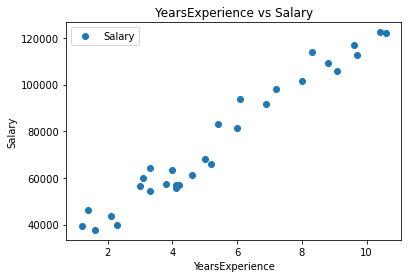

In [200]:
dataset.plot(x='YearsExperience',y='Salary',style='o')
plt.title(('YearsExperience vs Salary'))
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

b)using correlation Matrix

In [201]:
dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Confirms it has a Linear Relationship

# 5) Splitting DATA

In [202]:
X = dataset.loc[:,['YearsExperience']].values
y = dataset.loc[:,['Salary']].values

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [204]:
X_train.shape, X_test.shape

((22, 1), (8, 1))

In [205]:
y_train.shape, y_test.shape

((22, 1), (8, 1))

# 2nd JAR: TASK - SL - LINEAR REGRESSION

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

# 3rd JAR: Model

In [207]:
print(f'''Model:
Predicted Salary = {regressor.coef_[0][0]} * YearsExperience + {regressor.intercept_[0]}
''')

Model:
Predicted Salary = 9337.140734816745 * YearsExperience + 26116.199357431033



In [208]:
print('Model Works well in the range of',round(dataset.YearsExperience.min(),1), 'and',dataset.YearsExperience.max())

Model Works well in the range of 1.2 and 10.6


In [209]:
print('Enter YearsExperience in the range of 1.2 and 10.6')
a = float(input())
a

Enter YearsExperience in the range of 1.2 and 10.6
2.2


2.2

In [210]:
regressor.predict([[a]])

array([[46657.90897403]])

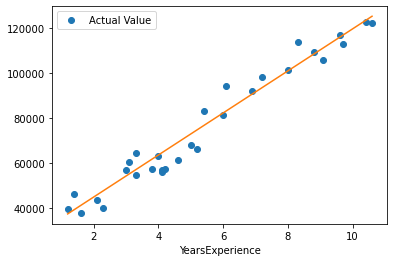

In [216]:
Predicted_Salary = 9337.140734816745 * dataset.YearsExperience.values + 26116.199357431033
Predicted_Salary
dataset.plot(x='YearsExperience',y='Salary',style='o',label='Actual Value')
plt.plot(dataset.YearsExperience.values,Predicted_Salary,label='Predicted Line')

# 4th JAR: LOSS

In [212]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 64398.47637018],
       [125089.89114649],
       [103614.46745641],
       [111084.18004426],
       [ 82139.04376633],
       [ 63464.7622967 ],
       [ 41055.62453314],
       [ 65332.19044366]])

In [213]:
tt = pd.DataFrame(y_test)
tt['Predicted']=y_pred
tt.columns=['Actual','Predicted']
tt

,Actual,Predicted
0,55795.0,64398.476370
1,121873.0,125089.891146
2,113813.0,103614.467456
3,105583.0,111084.180044
4,81364.0,82139.043766
5,63219.0,63464.762297
6,37732.0,41055.624533
7,57082.0,65332.190444


In [214]:
tt

,Actual,Predicted
0,55795.0,64398.476370
1,121873.0,125089.891146
2,113813.0,103614.467456
3,105583.0,111084.180044
4,81364.0,82139.043766
5,63219.0,63464.762297
6,37732.0,41055.624533
7,57082.0,65332.190444


In [215]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 37301807.07035338


# 5th JAR Learning - Gradient Descent; is dealt in Model Jar itself

# 6th JAR Evaluation Metric

In [218]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
# regressor.score(X_test,y_test) - Another Method

R2- SCORE: 0.955664040532678


Good R2 Score